In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [2]:
results_ref = pd.read_csv(
    "Reference_7071.csv",
    index_col=0,          # use first column as index
    parse_dates=True      # automatically parse as datetime if possible
)



results_agri = pd.read_csv(
    "Scenario_no_agri_7071.csv",
    index_col=0,          # use first column as index
    parse_dates=True      # automatically parse as datetime if possible
)

results_kwave = pd.read_csv(
    "RoutingWave_7071.csv",
    index_col=0,          # use first column as index
    parse_dates=True      # automatically parse as datetime if possible
)

results_CMIP = pd.read_csv(
    "Reference_CMIP_7071.csv",
    index_col=0,          # use first column as index
    parse_dates=True      # automatically parse as datetime if possible
)

In [3]:
from ewatercycle.observation.grdc import get_grdc_data

grdc_chatly = get_grdc_data(2817100,
                   '1900-01-01T00:00Z',
                   '2001-01-01T00:00Z',
                   data_home='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/')

grdc_kerki = get_grdc_data(2617110,
                   '1900-01-01T00:00Z',
                   '2001-01-01T00:00Z',
                   data_home='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/')





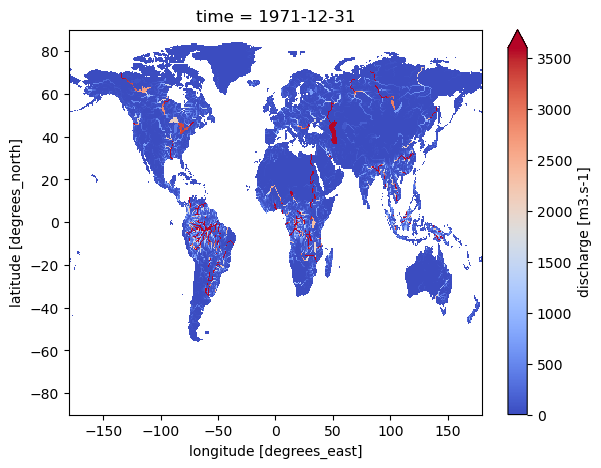

In [4]:
file_name = '/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Comparison/30min_7071_discharge.nc'
ds_1 = xr.open_dataset(file_name)
# get the first variable name
first_var = list(ds_1.data_vars)[0]

# select that variable and last timestep
da_1 = ds_1[first_var].isel(time=-1)


#da_1 = ds_1[0].isel(time =-1)


da_1.plot(cmap="coolwarm", robust=True, size=5)

#plt.title(str(da["valid_time"].values))  # extract timestamp from coords
#plt.savefig('ERA5_pr_1988-12-22_21UTC.png')
plt.show()

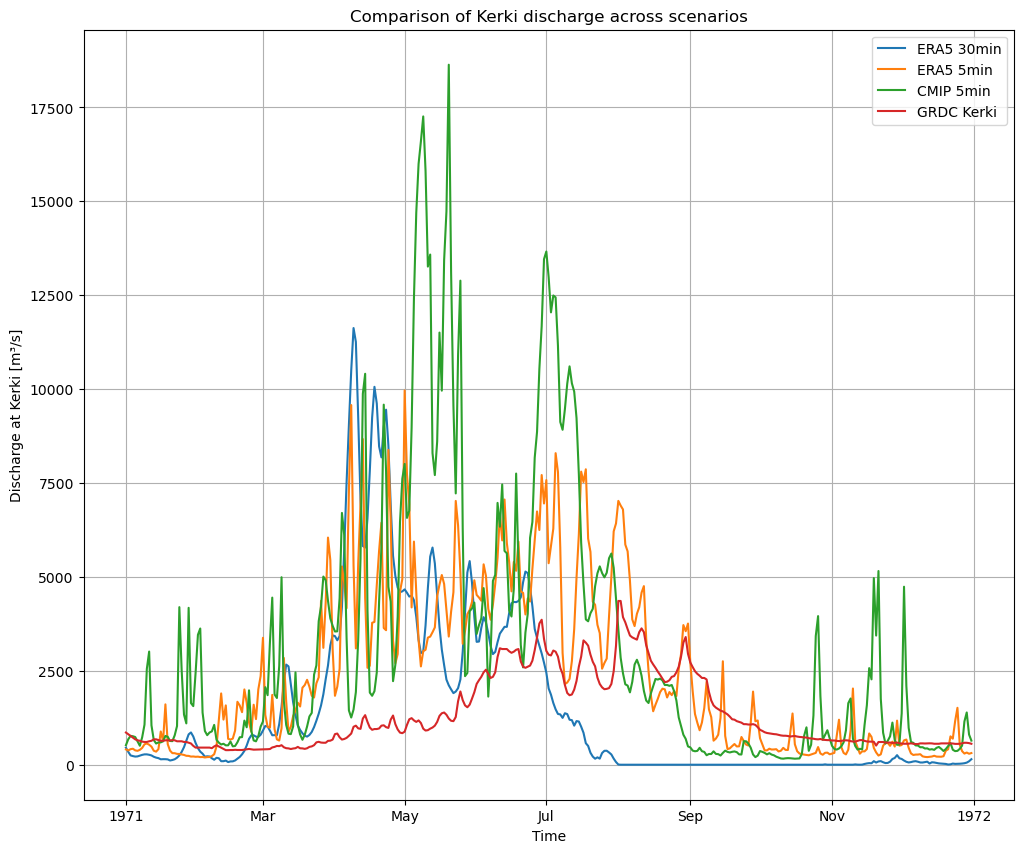

In [14]:
plt.figure(figsize=(12, 10))
da_slice = ds_1[first_var].sel(lat=41.84,lon=60.52, method="nearest")
plt.plot(da_slice.loc[' 1971']['time'], da_slice.loc[' 1971'], label='ERA5 30min')

plt.plot(results_ref.loc['1971']['Kerki'], label='ERA5 5min')
# plt.plot(results_agri.loc['1971']['Kerki'], label='No Agriculture scenario')
# plt.plot(results_kwave.loc['1971']['Kerki'], label='Kinematic Wave')
plt.plot(results_CMIP.loc['1971']['Kerki'], label='CMIP 5min')
grdc_kerki['streamflow'].sel(time=slice('1971', '1971')).plot(label='GRDC Kerki')


plt.xlabel('Time')
plt.ylabel('Discharge at Kerki [m³/s]')
plt.title('Comparison of Kerki discharge across scenarios')
plt.legend()
#plt.xlim(0,365)
plt.grid(True)
plt.show()


<xarray.DataArray 'discharge' (time: 730)> Size: 3kB
[730 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 6kB 1970-01-01 1970-01-02 ... 1971-12-31
    lat      float32 4B 41.75
    lon      float32 4B 60.75
Attributes:
    standard_name:  discharge
    long_name:      discharge
    units:          m3.s-1

<xarray.Dataset> Size: 316kB
Dimensions:              (time: 19724)
Coordinates:
  * time                 (time) datetime64[ns] 158kB 1936-01-01 ... 1989-12-31
    id                   int64 8B 2617110
Data variables:
    streamflow           (time) float64 158kB 914.0 938.0 926.0 ... 604.0 583.0
    area                 float64 8B 3.09e+05
    country              <U2 8B 'TM'
    geo_x                float64 8B 65.25
    geo_y                float64 8B 37.83
    geo_z                float64 8B 241.0
    owneroforiginaldata  <U85 340B 'Initial dataset collected in the framewor...
    river_name           <U9 36B 'AMU DARYA'
    station_name         <U5 20B 'KERKI'
    timezone             float64 8B nan
Attributes:
    title:          NA
    Conventions:    CF-1.7
    references:     grdc.bafg.de
    institution:    GRDC
    history:        Converted from 2617110_Q_Day.Cmd.txt of 2025-09-02 to net...
    missing_value:  -999.000

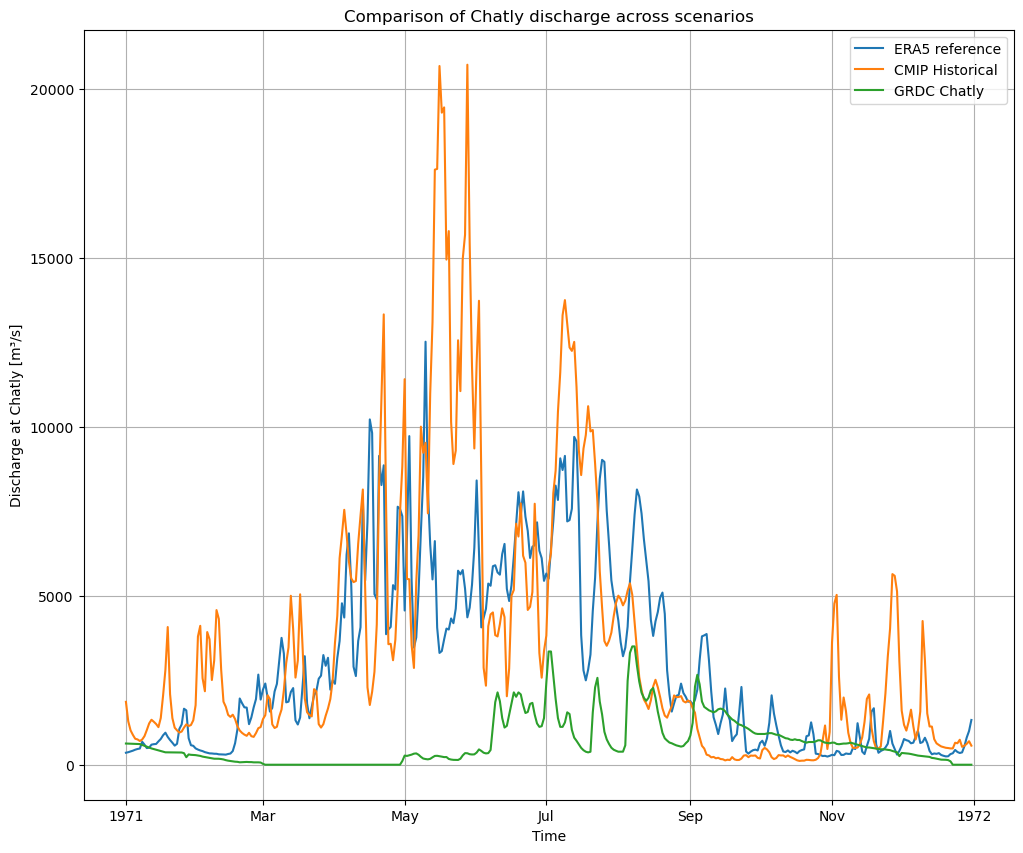

In [ ]:
plt.figure(figsize=(12, 10))

plt.plot(results_ref.loc['1971']['Chatly'], label='ERA5 reference')
#plt.plot(results_agri.loc['1971']['Chatly'], label='No Agriculture scenario')
#plt.plot(results_kwave.loc['1971']['Chatly'], label='Kinematic Wave')
plt.plot(results_CMIP.loc['1971']['Chatly'], label='CMIP Historical')
grdc_chatly['streamflow'].sel(time=slice('1971', '1971')).plot(label='GRDC Chatly')


plt.xlabel('Time')
plt.ylabel('Discharge at Chatly [m³/s]')
plt.title('Comparison of Chatly discharge across scenarios')
plt.legend()
#plt.xlim(0,365)
plt.grid(True)
plt.show()